# Brecha salarial

Para el siguiente proyecto usamos un dataset público obtenido por Kaggle, con información de Glassdor EEUU de 2020. Este es el enlace que lleva a la página para su descarga: 
```
https://www.kaggle.com/datasets/nilimajauhari/glassdoor-analyze-gender-pay-gap
```
El objetivo principal del proyecto es encontrar información que permita sacar conclusiones sobre la brecha salarial de Estados Unidos y si esta tiene fundamentos en el desempeño de las trabajadoras o no.


In [ ]:
#Comenzamos importando librerías que serán de utilidad más adelante
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.offline as py

In [ ]:
#Leemos el dataset
gap = pd.read_csv('/content/Glassdoor Gender Pay Gap.csv')

In [ ]:
#Vemos qué contiene
gap.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


In [ ]:
#Con esto podemos tener una idea superficial de las estadísticas del dataset
gap.describe()

,Age,PerfEval,Seniority,BasePay,Bonus
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.393000,3.037000,2.971000,94472.653000,6467.161000
std,14.294856,1.423959,1.395029,25337.493272,2004.377365
min,18.000000,1.000000,1.000000,34208.000000,1703.000000
25%,29.000000,2.000000,2.000000,76850.250000,4849.500000
50%,41.000000,3.000000,3.000000,93327.500000,6507.000000
75%,54.250000,4.000000,4.000000,111558.000000,8026.000000
max,65.000000,5.000000,5.000000,179726.000000,11293.000000


In [ ]:
#Esto nos permite saber el tipo de datos que tenemos en las columnas y filas del dataset
gap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   1000 non-null   object
 1   Gender     1000 non-null   object
 2   Age        1000 non-null   int64 
 3   PerfEval   1000 non-null   int64 
 4   Education  1000 non-null   object
 5   Dept       1000 non-null   object
 6   Seniority  1000 non-null   int64 
 7   BasePay    1000 non-null   int64 
 8   Bonus      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [ ]:
gap_M = gap[gap['Gender']== 'Male']
gap_M

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319
7,Software Engineer,Male,18,4,PhD,Engineering,5,97523,10240
10,Graphic Designer,Male,24,5,PhD,Engineering,5,102261,10212
...,...,...,...,...,...,...,...,...,...
988,Sales Associate,Male,62,1,Masters,Administration,2,102593,1823
996,Data Scientist,Male,57,1,Masters,Sales,2,108977,3567
997,Financial Analyst,Male,48,1,High School,Operations,1,92347,2724
998,Financial Analyst,Male,65,2,High School,Administration,1,97376,2225


In [ ]:
gap_F = gap[gap['Gender']== 'Female']
gap_F

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
5,IT,Female,20,5,PhD,Operations,4,70890,10126
6,Graphic Designer,Female,20,5,College,Sales,4,67585,10541
8,Graphic Designer,Female,33,5,High School,Engineering,5,112976,9836
...,...,...,...,...,...,...,...,...,...
991,IT,Female,65,1,Masters,Administration,1,106945,2041
992,Graphic Designer,Female,63,1,College,Administration,2,81545,3418
993,Marketing Associate,Female,65,1,Masters,Administration,1,80789,1884
994,Marketing Associate,Female,64,1,PhD,Administration,2,85253,2777


In [ ]:
gap['JobTitle'].unique()

array(['Graphic Designer', 'Software Engineer', 'Warehouse Associate',
       'IT', 'Sales Associate', 'Driver', 'Financial Analyst',
       'Marketing Associate', 'Data Scientist', 'Manager'], dtype=object)

In [ ]:
tech = ['IT','Software Engineer', 'Data Scientist']

In [ ]:
others = ['Graphic Designer', 'Warehouse Associate', 'Sales Associate', 'Driver', 'Financial Analyst',
       'Marketing Associate', 'Manager']

# ¿La brecha salarial es menor en puestos de tecnologia que en otras áreas?



In [ ]:
#df = gap.pivot_table(index=['JobTitle'], values=['BasePay'], columns=['Gender'], aggfunc=[np.mean],
                        #fill_value=-1, 
                        #margins=True)
#df
for job in gap['JobTitle']:
  df = gap.pivot_table(index=['JobTitle'], values=['BasePay'], columns=['Gender'], aggfunc=[np.mean],
                        fill_value=-1, 
                        margins=True)
df


mean                              
                           BasePay                              
Gender                      Female           Male            All
JobTitle                                                        
Data Scientist        95704.792453   89222.629630   92433.420561
Driver                86867.630435   91952.666667   89382.208791
Financial Analyst     95458.326531   94607.034483   94996.878505
Graphic Designer      92243.291667   89595.800000   90892.530612
IT                    90475.720000   91021.978261   90737.468750
Manager              127252.277778  124848.930556  125329.600000
Marketing Associate   76119.177570   81881.818182   76656.372881
Sales Associate       91894.209302   94663.117647   93396.489362
Software Engineer     94701.000000  106371.485149  105514.935780
Warehouse Associate   92428.260870   86553.431818   89556.122222
All                   89942.818376   98457.545113   94472.653000

In [ ]:
gap.groupby(['Gender', 'JobTitle'])['BasePay'].mean()

Gender  JobTitle           
Female  Data Scientist          95704.792453
        Driver                  86867.630435
        Financial Analyst       95458.326531
        Graphic Designer        92243.291667
        IT                      90475.720000
        Manager                127252.277778
        Marketing Associate     76119.177570
        Sales Associate         91894.209302
        Software Engineer       94701.000000
        Warehouse Associate     92428.260870
Male    Data Scientist          89222.629630
        Driver                  91952.666667
        Financial Analyst       94607.034483
        Graphic Designer        89595.800000
        IT                      91021.978261
        Manager                124848.930556
        Marketing Associate     81881.818182
        Sales Associate         94663.117647
        Software Engineer      106371.485149
        Warehouse Associate     86553.431818
Name: BasePay, dtype: float64

#¿Qué departamentos tienen mayor brecha salarial?

Para responder la pregunta anterior, haremos una tabla pivote que nos permita una mejor visualización de la información agrupando por género y por departamento y calculando el promedio del salario base anual.

In [ ]:
new_df = gap.pivot_table(index=['Dept'], values=['BasePay'], columns=['Gender'], aggfunc=[np.mean],
                        fill_value=-1, 
                        margins=True)
new_df

mean                             
                     BasePay                             
Gender                Female           Male           All
Dept                                                     
Administration  87071.873684   96170.744898  91692.025907
Engineering     90774.955056  101433.000000  96492.552083
Management      92679.011494   99482.297297  96492.974747
Operations      86456.156250   93118.438596  90072.823810
Sales           92867.079208  102349.481132  97722.801932
All             89942.818376   98457.545113  94472.653000

De la tabla anterior podemos concluir que los hombres en Ingeniería, Ventas y Administración perciben anualmente alrededor de \$10,600, \$9,400 y $9,100 USD más que las mujeres.

La brecha salarial en promedio (considerando todos los departamentos) asciende aproximadamente a $8,500 USD anuales. También puede notarse que en todos los departamentos los hombres siempre perciben más dinero que las mujeres.

Podemos visualizar esta información con la gráfica mostrada a continuación:

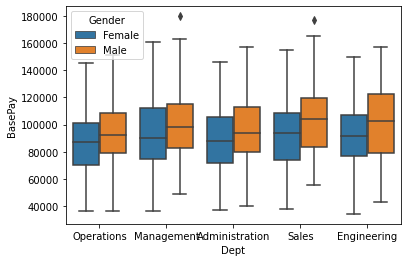

In [ ]:
box_plot_deptos = sns.boxplot(x = "Dept", y = "BasePay", hue = "Gender", data = gap)

Más adelante veremos si las diferencias en el salario de hombres y mujeres pueda verse afectada por factores como Seniority, Education o PerfEval o si se trata más bien de cuestiones de género.

----------

### **Representación de mujeres en los distintos trabajos**

In [ ]:
#Agrupamos por JobTitle y contamos en base al numero de empleados en base a su genero.
job_gender_raw = gap.groupby(['JobTitle']).Gender.value_counts()
#Lo hacemos un dataframe
job_gender = job_gender_raw.to_frame()
#Renombramos una de las columnas por Val
job_gender_r = job_gender.rename({'Gender' : 'Val'}, axis=1)
#Reseteamos los index para hacer el grafico
df_jg = job_gender_r.reset_index()
df_jg 

,JobTitle,Gender,Val
0,Data Scientist,Male,54
1,Data Scientist,Female,53
2,Driver,Female,46
3,Driver,Male,45
4,Financial Analyst,Male,58
5,Financial Analyst,Female,49
6,Graphic Designer,Male,50
7,Graphic Designer,Female,48
8,IT,Female,50
9,IT,Male,46


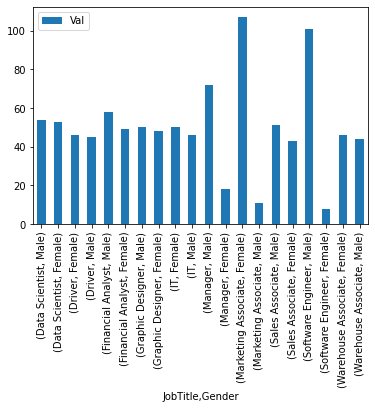

In [ ]:
job_gender_r.plot(kind='bar')

In [ ]:
import seaborn as sns

Text(0, 0.5, 'Numero de empleados')

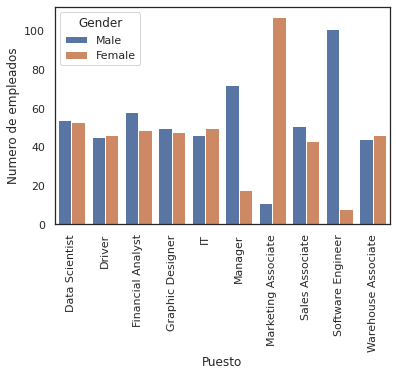

In [ ]:
#Seleccionamos un tema
sns.set(style='white')
#Creamos el grafico
sns.barplot(x='JobTitle', y='Val', hue='Gender', data= df_jg) 
#Rotamos los nombres de los puestos para que puedan verse
plt.xticks(rotation=90)
#Asigamos etiquetas
plt.xlabel('Puesto')
plt.ylabel('Numero de empleados')

-------

In [ ]:
df_rend_g = gap.groupby(['PerfEval']).Gender.value_counts()
df_rend_g

PerfEval  Gender
1         Female    106
          Male       92
2         Male      102
          Female     90
3         Male      106
          Female     88
4         Male      111
          Female     96
5         Male      121
          Female     88
Name: Gender, dtype: int64

---------------------------------------

**Representación de mujeres en los trabajos**

In [ ]:
rslt_jg_F_raw = df_jg[df_jg['Gender'] == 'Female']
rslt_jg_F = rslt_jg_F_raw.reset_index(drop=True)
rslt_jg_F

,JobTitle,Gender,Val
0,Data Scientist,Female,53
1,Driver,Female,46
2,Financial Analyst,Female,49
3,Graphic Designer,Female,48
4,IT,Female,50
5,Manager,Female,18
6,Marketing Associate,Female,107
7,Sales Associate,Female,43
8,Software Engineer,Female,8
9,Warehouse Associate,Female,46


In [ ]:
rslt_jg_M_raw = df_jg[df_jg['Gender'] == 'Male']
rslt_jg_M = rslt_jg_M_raw.reset_index(drop=True)
rslt_jg_M

,JobTitle,Gender,Val
0,Data Scientist,Male,54
1,Driver,Male,45
2,Financial Analyst,Male,58
3,Graphic Designer,Male,50
4,IT,Male,46
5,Manager,Male,72
6,Marketing Associate,Male,11
7,Sales Associate,Male,51
8,Software Engineer,Male,101
9,Warehouse Associate,Male,44


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels = ["Data Scientist	", "Driver", "Financial Analyst", "Graphic Designer", "IT", "Manager", "Marketing Associate",
          "Sales Associate", "Software Engineer", "Warehouse Associate"]

figW = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
figW.add_trace(go.Pie(labels=labels, values=[53, 46, 49, 48, 50, 18, 107, 43, 8, 46], name="Mujeres"),
              1, 1)
figW.add_trace(go.Pie(labels=labels, values=[54, 45, 58, 50, 46, 72, 11, 51, 101, 44], name="Hombres"),
              1, 2)
figW.show()

In [ ]:
#rslt_jg_F['Val']
#rslt_jg_M['Val']

rslt_jg_F['total'] = rslt_jg_F['Val'] + rslt_jg_M['Val']
rslt_jg_F
rslt_jg_F['Perc_Muj'] = ((rslt_jg_F['Val'] / rslt_jg_F['total']) *100) 
rslt_jg_F

,JobTitle,Gender,Val,total,Perc_Muj
0,Data Scientist,Female,53,107,49.532710
1,Driver,Female,46,91,50.549451
2,Financial Analyst,Female,49,107,45.794393
3,Graphic Designer,Female,48,98,48.979592
4,IT,Female,50,96,52.083333
5,Manager,Female,18,90,20.000000
6,Marketing Associate,Female,107,118,90.677966
7,Sales Associate,Female,43,94,45.744681
8,Software Engineer,Female,8,109,7.339450
9,Warehouse Associate,Female,46,90,51.111111


In [ ]:
Perc_rep_Muj_raw = rslt_jg_F[['JobTitle','Perc_Muj']]
Perc_rep_Muj = Perc_rep_Muj_raw.reset_index(drop=True)
Perc_rep_Muj['dif % rep'] = ((Perc_rep_Muj['Perc_Muj']) - 50)
Perc_rep_Muj

,JobTitle,Perc_Muj,dif % rep
0,Data Scientist,49.532710,-0.467290
1,Driver,50.549451,0.549451
2,Financial Analyst,45.794393,-4.205607
3,Graphic Designer,48.979592,-1.020408
4,IT,52.083333,2.083333
5,Manager,20.000000,-30.000000
6,Marketing Associate,90.677966,40.677966
7,Sales Associate,45.744681,-4.255319
8,Software Engineer,7.339450,-42.660550
9,Warehouse Associate,51.111111,1.111111


In [ ]:
import plotly.express as px
fig = px.bar(Perc_rep_Muj, x='JobTitle', y='dif % rep', color = 'JobTitle', color_discrete_map={
        'Data Scientist': '#A69CAC',
        'Driver': '#161B33',
        'Financial Analyst':'#161B33',
        'Graphic Designer':'#161B33',
        'IT':'#A69CAC',
        'Manager':'#161B33',
        'Marketing Associate':'#161B33',
        'Sales Associate':'#161B33',
        'Software Engineer':'#A69CAC',
        'Warehouse Associate':'#161B33',

    })
fig.show()

------------------------------------

### **¿Hay discrepancia en los bonos recibidos por género?**

In [ ]:
#Agrupamos por JobTitle y contamos en base al numero de empleados en base a su genero.
df_raw = gap[['Gender','Bonus', 'PerfEval', 'Seniority']]
df_raw.head()
# --bonus_gender_rend = bonus_gender.rename({'Gender' : 'Val'}, axis=1)
#Reseteamos los index para hacer el grafico
#  df_bonus = job_gender_r.reset_index()
#  df_bonus 

,Gender,Bonus,PerfEval,Seniority
0,Female,9938,5,2
1,Male,11128,5,5
2,Female,9268,4,5
3,Male,10154,5,4
4,Male,9319,5,5


**Discrepancia en los bonos recibidos por su antiguedad en función de su genero**

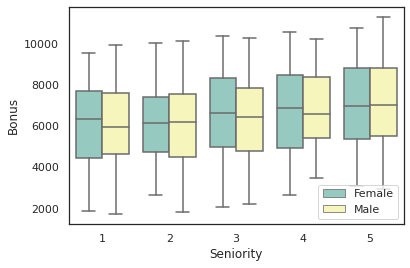

In [ ]:
ax = sns.boxplot(x="Seniority", y="Bonus", hue="Gender", data=df_raw, palette="Set3")
plt.legend(loc ="lower right")



*   No se observa diferencia con respecto a su antiguedad
*   En algunos de los casos las mujeres reciben una mayor cantidad en bonos, lo que puede estar relacionado con su desempeño



**Discrepancia en los bonos recibido en función de su rendimiento**

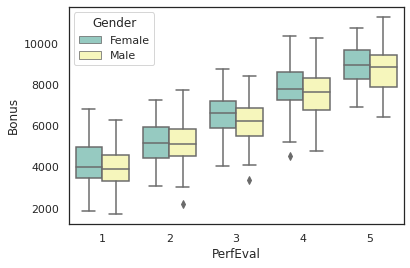

In [ ]:
ax = sns.boxplot(x="PerfEval", y="Bonus", hue="Gender", data=df_raw, palette="Set3")

No se observa discrepancia reibida por su rendimeinto, siendo en todos los casos igual o mayor a la recibida por su contraparte masculina

-----------------------------

### **Diferencia en salario base entre mujeres y hombres**



**Calculo de porcentaje de salario base recibido por mujeres en base a al tipo de trabajo seleccionado**

In [ ]:
F_grp_jt =gap_F.groupby(['JobTitle'])
F_grp_jt
F_gap_bp_raw = F_grp_jt['BasePay'].mean()
F_gap_bp = pd.DataFrame(F_gap_bp_raw)
F_gap_bp.rename(columns = {'BasePay':'F_BPay'}, inplace = True)
F_gap_bp

,F_BPay
JobTitle,
Data Scientist,95704.792453
Driver,86867.630435
Financial Analyst,95458.326531
Graphic Designer,92243.291667
IT,90475.720000
Manager,127252.277778
Marketing Associate,76119.177570
Sales Associate,91894.209302
Software Engineer,94701.000000


**Calculo de porcentaje de salario base recibido por hombres en base a al tipo de trabajo seleccionado**

In [ ]:
M_grp_jt =gap_M.groupby(['JobTitle'])
M_grp_jt
M_gap_bp_raw  = M_grp_jt['BasePay'].mean()
M_gap_bp = pd.DataFrame(M_gap_bp_raw)
M_gap_bp.rename(columns = {'BasePay':'M_BPay'}, inplace = True)
M_gap_bp

,M_BPay
JobTitle,
Data Scientist,89222.629630
Driver,91952.666667
Financial Analyst,94607.034483
Graphic Designer,89595.800000
IT,91021.978261
Manager,124848.930556
Marketing Associate,81881.818182
Sales Associate,94663.117647
Software Engineer,106371.485149


In [ ]:
merge_grp_jt = F_gap_bp.join(M_gap_bp)
merge_grp_jt

,F_BPay,M_BPay
JobTitle,,
Data Scientist,95704.792453,89222.629630
Driver,86867.630435,91952.666667
Financial Analyst,95458.326531,94607.034483
Graphic Designer,92243.291667,89595.800000
IT,90475.720000,91021.978261
Manager,127252.277778,124848.930556
Marketing Associate,76119.177570,81881.818182
Sales Associate,91894.209302,94663.117647
Software Engineer,94701.000000,106371.485149


In [ ]:
merge_grp_jt['total'] = merge_grp_jt['F_BPay'] + merge_grp_jt['M_BPay']

merge_grp_jt['% gap'] = ((merge_grp_jt['F_BPay'] / merge_grp_jt['total']) *100) 
merge_grp_jt

merge_grp_jt_ni = merge_grp_jt.reset_index()
merge_grp_jt_ni

,JobTitle,F_BPay,M_BPay,total,% gap
0,Data Scientist,95704.792453,89222.629630,184927.422082,51.752623
1,Driver,86867.630435,91952.666667,178820.297101,48.578171
2,Financial Analyst,95458.326531,94607.034483,190065.361013,50.223947
3,Graphic Designer,92243.291667,89595.800000,181839.091667,50.727976
4,IT,90475.720000,91021.978261,181497.698261,49.849514
5,Manager,127252.277778,124848.930556,252101.208333,50.476663
6,Marketing Associate,76119.177570,81881.818182,158000.995752,48.176391
7,Sales Associate,91894.209302,94663.117647,186557.326949,49.257893
8,Software Engineer,94701.000000,106371.485149,201072.485149,47.097941
9,Warehouse Associate,92428.260870,86553.431818,178981.692688,51.641182


In [ ]:
merge_grp_jt_ni['dif % gap'] = ((merge_grp_jt_ni['% gap']) - 50)
merge_grp_jt_end = merge_grp_jt_ni.reset_index(drop=False)
merge_grp_jt_end

,index,JobTitle,F_BPay,M_BPay,total,% gap,dif % gap
0,0,Data Scientist,95704.792453,89222.629630,184927.422082,51.752623,1.752623
1,1,Driver,86867.630435,91952.666667,178820.297101,48.578171,-1.421829
2,2,Financial Analyst,95458.326531,94607.034483,190065.361013,50.223947,0.223947
3,3,Graphic Designer,92243.291667,89595.800000,181839.091667,50.727976,0.727976
4,4,IT,90475.720000,91021.978261,181497.698261,49.849514,-0.150486
5,5,Manager,127252.277778,124848.930556,252101.208333,50.476663,0.476663
6,6,Marketing Associate,76119.177570,81881.818182,158000.995752,48.176391,-1.823609
7,7,Sales Associate,91894.209302,94663.117647,186557.326949,49.257893,-0.742107
8,8,Software Engineer,94701.000000,106371.485149,201072.485149,47.097941,-2.902059
9,9,Warehouse Associate,92428.260870,86553.431818,178981.692688,51.641182,1.641182


In [ ]:
fig1 = px.bar(merge_grp_jt_end, x='JobTitle', y='dif % gap', color = 'JobTitle', color_discrete_map={
        'Data Scientist': '#A69CAC',
        'Driver': '#161B33',
        'Financial Analyst':'#161B33',
        'Graphic Designer':'#161B33',
        'IT':'#A69CAC',
        'Manager':'#161B33',
        'Marketing Associate':'#161B33',
        'Sales Associate':'#161B33',
        'Software Engineer':'#A69CAC',
        'Warehouse Associate':'#161B33',

    })
fig1.show()

### **¿Existe una relación entre las diferencias en el salario base y la representación de mujeres en esa area?**

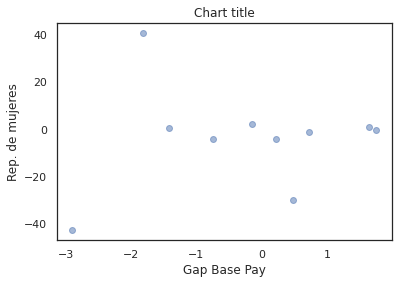

In [ ]:

plt.scatter(merge_grp_jt_end['dif % gap'], Perc_rep_Muj['dif % rep'],alpha=0.5 )
#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('Gap Base Pay')
plt.ylabel('Rep. de mujeres') 
#Show the plot
plt.show()

-------------------------

---------------------

In [ ]:
i_des=gap.groupby(['Gender','Bonus',]).describe()
print(i_des)

               Age                                                 PerfEval  \
             count  mean       std   min    25%   50%    75%   max    count   
Gender Bonus                                                                  
Female 1884    1.0  65.0       NaN  65.0  65.00  65.0  65.00  65.0      1.0   
       2041    2.0  62.0  4.242641  59.0  60.50  62.0  63.50  65.0      2.0   
       2251    1.0  62.0       NaN  62.0  62.00  62.0  62.00  62.0      1.0   
       2324    1.0  57.0       NaN  57.0  57.00  57.0  57.00  57.0      1.0   
       2645    1.0  65.0       NaN  65.0  65.00  65.0  65.00  65.0      1.0   
...            ...   ...       ...   ...    ...   ...    ...   ...      ...   
Male   10240   2.0  20.5  3.535534  18.0  19.25  20.5  21.75  23.0      2.0   
       10512   1.0  35.0       NaN  35.0  35.00  35.0  35.00  35.0      1.0   
       11067   1.0  25.0       NaN  25.0  25.00  25.0  25.00  25.0      1.0   
       11128   1.0  21.0       NaN  21.0  21.00  21.

In [ ]:
i_des=gap.groupby(['Gender','JobTitle']).describe()
print(i_des)

                              Age                                           \
                            count       mean        std   min    25%   50%   
Gender JobTitle                                                              
Female Data Scientist        53.0  43.000000  12.846730  20.0  33.00  43.0   
       Driver                46.0  42.021739  15.635414  18.0  28.75  43.5   
       Financial Analyst     49.0  40.734694  13.729190  18.0  30.00  43.0   
       Graphic Designer      48.0  41.187500  14.230109  18.0  30.00  43.5   
       IT                    50.0  42.900000  13.079428  18.0  32.25  44.0   
       Manager               18.0  44.611111  13.111014  24.0  32.50  45.0   
       Marketing Associate  107.0  42.121495  14.011929  18.0  29.50  42.0   
       Sales Associate       43.0  42.186047  13.928826  18.0  31.00  41.0   
       Software Engineer      8.0  37.000000  13.648652  22.0  27.75  32.0   
       Warehouse Associate   46.0  39.695652  13.754788  19.0  2

Con la información anterior podemos concluir que no hay una brecha salarial puesto que las variaciones de pago base por género respecto a seniority y productividad muestran pagos proporcionales sin importar el género.